# Chatper 28 - Nixtla and TimeGPT

# Listing 28-1. The Heat Wave data

In [3]:
import pandas as pd
y = pd.read_csv('heatwave-pageviews-20150701-20250531.csv')
y.columns = ['date', 'y']
y['date'] = pd.to_datetime(y['date'])
y = y[:-5]
y.head()

,date,y
0,2015-07-01,26379
1,2015-08-01,18584
2,2015-09-01,12529
3,2015-10-01,15343
4,2015-11-01,13545


# Listing 28-2. Adapting the Heat Wave Data to the Nixtla Verse

In [4]:
y["unique_id"]="1"
y.columns=["ds", "y", "unique_id"]
y.head()

,ds,y,unique_id
0,2015-07-01,26379,1
1,2015-08-01,18584,1
2,2015-09-01,12529,1
3,2015-10-01,15343,1
4,2015-11-01,13545,1


# Listing 28-3. Train test split

In [14]:
train = y.iloc[:-12]
test = y.iloc[-12:]

# Listing 28-4. fit AutoArima using StatsForecast

In [ ]:
#!pip install statsforecast

In [21]:
import scipy.stats as stats
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import arima_string

# Specify the list of models and season length
models = [AutoARIMA(season_length=12)]

# Instantiate the Statsforecast, freq MS for month start
arima = StatsForecast(models=models, freq='MS')

# Fit the auto arima on the training data
arima.fit(df=train)

# Print selected arima
arima_string(arima.fitted_[0,0].model_)

StatsForecast(models=[AutoARIMA])

## Listing 28-5. Predict on test set

In [27]:
fcst = arima.forecast(df=test, h=12, fitted=True)
fcst

,unique_id,ds,AutoARIMA
0,1,2025-01-01,8484.261719
1,1,2025-02-01,7128.412109
2,1,2025-03-01,5989.237305
3,1,2025-04-01,5032.111328
4,1,2025-05-01,4227.941406
5,1,2025-06-01,3552.283691
6,1,2025-07-01,2984.601562
7,1,2025-08-01,2507.639404
8,1,2025-09-01,2106.899414
9,1,2025-10-01,1770.200684


## Listing 28-6. Compute 1-MAPE

In [34]:
from sklearn.metrics import mean_absolute_percentage_error

actual_values=test['y'].values
fcst_values=fcst['AutoARIMA'].values

mape=mean_absolute_percentage_error(actual_values, fcst_values)
mape

## Listing 28-7. Plot Forecast

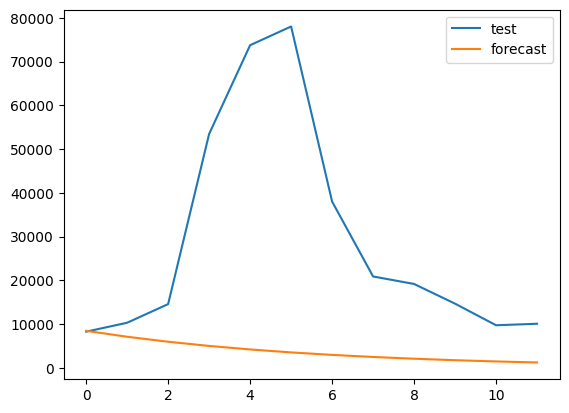

In [40]:
import matplotlib.pyplot as plt

plt.plot(actual_values)
plt.plot(fcst_values)
plt.legend(['test', 'forecast'])
plt.show()

## Listing 28-8. NixtlaClient

In [ ]:
from nixtla import NixtlaClient
nixtla_client = NixtlaClient(api_key = '...')

## Listing 28-9. Call the API

In [ ]:
model = nixtla_client.forecast(
    df=train,
    model="timegpt-1",
    h=12,
    freq="MS",
    time_col="ds",
    target_col="y",
)
